In [2]:
from mpl_toolkits.mplot3d import Axes3D 
import matplotlib.pyplot as plt
from matplotlib import cm 
from matplotlib.ticker import LinearLocator, FormatStrFormatter 
import numpy as np 
from random import random, seed
import functions as fx
import sklearn.model_selection as sklm

# Introduction

The aim of this project, is to investigate several regression algorithms and explore their strengths and weaknesses. The first algorithm we will discuss is Oridinary Least Squares (OLS), Ridge regression and LASSO regression. These algorithms will be employed on the Franke function, before being employed on a real topography dataset. Through testing of these regression algorithms, important aspects in data analysis will be explored. These aspects include splitting of data in training and test data, bias-variance tradeoff and resampling of data.  

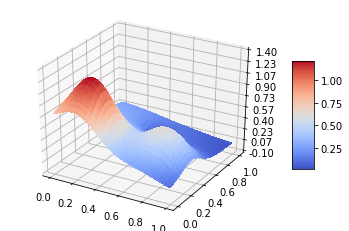

In [3]:
fig         = plt.figure() 
ax          = fig.gca(projection='3d')
n_x         = 200

# Make data. 
x           = np.sort(np.random.uniform(0, 1, n_x))
y           = np.sort(np.random.uniform(0, 1, n_x))
design      = fx.DesignDesign(x,y,5)

x, y        = np.meshgrid(x,y)
noise_level = 0.0


frank       = fx.FrankeFunction(x, y, noise_level)


# Plot the surface. 
surf        = ax.plot_surface(x, y, frank, cmap=cm.coolwarm, linewidth=0, antialiased=False)
# Customize the z axis. 
ax.set_zlim(-0.10, 1.40) 
ax.zaxis.set_major_locator(LinearLocator(10)) 
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))
# Add a color bar which maps values to colors. 
fig.colorbar(surf, shrink=0.5, aspect=5)
plt.show()


# Method

Linear regression is the simplest form of regression, in which a set of discrete points are approximated by a linear function on the form $f(x)=Ax+B$. However, consider a case where the discrete datapoints do not follow a linear pattern, but rather a polynomial of power N. Approximating the n-th power polynomial with a linear model will in this case yield an unsatisfactory result. Before delving into the results, it is beneficial to explore the basics regression. 



### Design matrix and model

As briefly mentioned above, when employing a regression algorithm the choice of model will heavily influence the result. Consider the cexample above, with data distributed along a polynomial of power N. Assume also some randomly distibuted noise. The best model in this case would be a polynomial on same form as the Franke function. However, in the general case, little a-priori information about the is known. 










### Regression

Given a set of discrete datapoints $\boldsymbol{\hat{y}}=[y_1,y_2,...,y_{n-1},y_{n}]$, regression can be regarded as the method of choice for fitting a continous function. In this case, it can be assumed that these datapoints are a function of some parameter $x=[x_1,x_2,...,x_{n-1},x_{n}]$. Assume the continous function governing the distribution of these datapoints can be described as 

$$
y=f(x)+\epsilon,
$$

and for the discrete case

$$
y_i=f(x_i)+\epsilon_i= \tilde{y}_i + \epsilon_i
$$

Here, $\tilde{y}_i$ is the prediction while $\epsilon_i$ is the prediction error. For the general case $y_i$ can be considered as the sum of some unknown weights ($\boldsymbol{\beta}$) multiplied by a design matrix with addition to an error term:

$$
y_i=\sum_{j=0}^{n-1} \beta_j x_i^{p_j} + \epsilon_i,
$$

where $p$ is of length $n$ and defines the model WE want to fit. Expanding this to general equation form yields:

$$
\begin{align*}
y_0&=\beta_0+\beta_1x_0^{p_1}+\beta_2x_0^{p_2}+\dots+\beta_{n-1}x_0^{p_{n-1}}+\epsilon_0\\
y_1&=\beta_0+\beta_1x_1^{p_1}+\beta_2x_1^{p_2}+\dots+\beta_{n-1}x_1^{p_{n-1}}+\epsilon_1\\
\dots & \dots \\
y_{n-1}&=\beta_0+\beta_1x_{n-1}^{p_1}+\beta_2x_{n-1}^{p_2}+\dots+\beta_{n-1}x_{n-1}^{p_{n-1}}+\epsilon_{n-1},\\
\end{align*}
$$

and on matrix form, 

$$
\boldsymbol{y} = \boldsymbol{X}\boldsymbol{\beta}+\boldsymbol{\epsilon}.
$$


Where

$$
\boldsymbol{X}=
\begin{bmatrix} 
1& x_{0}^{p_1} &x_{0}^{p_2}& \dots & \dots &x_{0}^{p_{n-1}}\\
1& x_{1}^{p_1} &x_{1}^{p_2}& \dots & \dots &x_{1}^{p_{n-1}}\\
1& x_{2}^{p_1} &x_{2}^{p_2}& \dots & \dots &x_{2}^{p_{n-1}}\\                      
\dots& \dots &\dots& \dots & \dots &\dots\\
1& x_{n-1}^{p_1} &x_{n-1}^{p_2}& \dots & \dots &x_{n-1}^{p_{n-1}}\\
\end{bmatrix},
$$
 

$$
\boldsymbol{\beta} = [\beta_0,\beta_1, \beta_2,\dots, \beta_{n-1}]^T,
$$

and

$$
\boldsymbol{\epsilon} = [\epsilon_0,\epsilon_1, \epsilon_2,\dots, \epsilon_{n-1}]^T.
$$

The optimal fitting paramters $\beta$ are then found by minimizing the residual square of sums (Hastie et al., 1231), i.e minimizing the cost function:

$$
C(\beta)=\sum_{i=0}^{n-1}(y_i-x_{i,*}^T\beta)^2
$$

By taking the derivative with respect to $\beta$, Hastie et. al (1349) shows that the fitting parameters can be computed as

$$
\hat{\beta}=(X^TX)^{-1}X^Ty.
$$

It is important to note that this equation can break down in the case of $X^TX$ being singular, and thus cannot be inverted. This method of obtaining the fitting paramters is denoted Oridinary Least Squares (OLS). In the unfortunate case of an uninvertible matrix, other estimation processes must be employed.


### Ridge regression

When employing Ridge regression, a penalty parameter $\lambda$ is introduced. 


# OLS

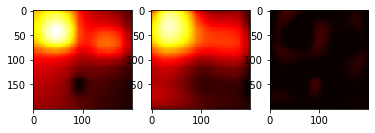

MSE OLS 0.001856173694194616
r2 OLS 0.9788609630100452


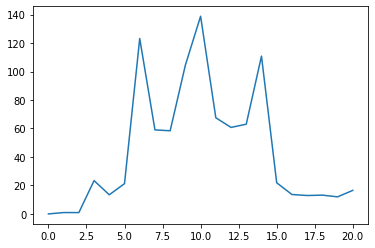

In [19]:

beta_ols, frank_pred_ols       = fx.OridinaryLeastSquares(design,np.ravel(frank),design)


pred_ols       = frank_pred_ols.reshape((int(len(frank_pred)/n_x),n_x))

plt.subplot(131)
plt.imshow(frank, label='test',cmap='hot',vmin=np.min(frank), vmax=np.max(frank))

plt.subplot(132)
plt.imshow(pred_ols, label='pred',cmap='hot',vmin=np.min(frank), vmax=np.max(frank))

plt.subplot(133)
plt.imshow(pred_ols-frank, label='differance',cmap='hot',vmin=np.min(frank), vmax=np.max(frank))

plt.show()

# mean squared error 
mse_ols   = fx.MSE(frank,pred_ols)
print('MSE OLS', mse_ols)

# R2 score 
r2_ols    = fx.R2Score(frank,pred_ols)
print('r2 OLS', r2_ols)

# variance beta
var_ols   = fx.VarianceBeta(design)
plt.plot(var_ols)
plt.show()


# Ridge

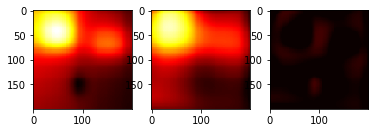

MSE Ridge 0.0018992446556372973
r2 Ridge 0.9783704492989753


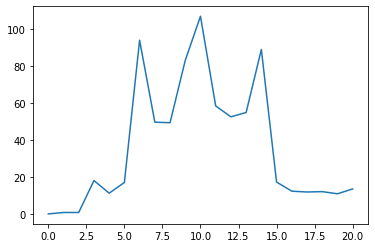

In [20]:
_lambda            = 10e-04
beta_ridge, frank_pred_ridge   = fx.RidgeRegression(design,np.ravel(frank),design,_lambda)
   

pred_ridge         = frank_pred_ridge.reshape((int(len(frank_pred)/n_x),n_x))

plt.subplot(131)
plt.imshow(frank, label='test',cmap='hot',vmin=np.min(frank), vmax=np.max(frank))


plt.subplot(132)
plt.imshow(pred_ridge, label='pred',cmap='hot',vmin=np.min(frank), vmax=np.max(frank))


plt.subplot(133)
plt.imshow(pred_ridge-frank, label='differance',cmap='hot',vmin=np.min(frank), vmax=np.max(frank))

plt.show()

# mean squared error 
mse_ridge   = fx.MSE(frank,pred_ridge)
print('MSE Ridge', mse_ridge)

# R2 score 
r2_ridge    = fx.R2Score(frank,pred_ridge)
print('r2 Ridge', r2_ridge)

# variance beta
var_ridge   = fx.VarianceBeta(design,_lambda)
plt.plot(var_ridge)
plt.show()




In [ ]:
x_train, x_test, frank_train, frank_test = sklm.train_test_split(design,np.ravel(frank))


beta_ols   = fx.OridinaryLeastSquares(x_train,frank_train)
frank_pred = x_test @ beta_ols

pred = frank_pred.reshape((int(len(frank_pred)/n_x),n_x))

plt.plot(np.sort(frank_test), label='test')
plt.plot(np.sort(frank_pred), label='pred')
plt.legend()
plt.show()

